# Importing Libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns
sns.set()

## Data generation

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1)) # Randomly generate 1000 from -10 to 10 of size (1000,1)
zs = np.random.uniform(-10, 10, (observations,1)) # Randomly generate 1000 from -10 to 10 of size (1000,1)

generated_inputs = np.column_stack((xs,zs)) # Stack/ concatenate the generated data

noise = np.random.uniform(-1, 1, (observations,1)) # Randomly generate 1000 numbers from -1 to 1 of size (1000,1)

generated_targets = 2*xs - 3*zs + 5 + noise # Objective Function to Produce out with coeff of this nature

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets) # save generated data into an n-D array file

# filename: TF_intro
# name of data n-D array I am saving: inputs
# saved data n-D array: generated_inputs

# name of target n-D array I am saving: targets
# saved target n-D array: generated_targets


## Training with TensorFlow

In [3]:
training_data = np.load('TF_intro.npz')
training_data

In [4]:
input_size = 2 # Two input variables xs and zs
output_size = 1 # One output variable y

### Building the model

In [5]:
# Keras is used as TF2 is Based Keras
# Sequential specifies how a (the new ) model is (will be) laid down -> Stack Layers
# Linear combinations + output = Outpu layer

model = tf.keras.Sequential([
        tf.keras.layers.Dense(input_size) # Takes the inputs provided and calculates the dot prouct
#                                           of the inputs & weights and adds the bias
])

### Objective function and Optimization Algorithm

In [6]:
# Optimization algorithm SDG(Stochastic Gradient Descent)

model.compile(optimizer='sgd', loss='mean_squared_error') # Configure's the model for training

# Fit training Data
# Each iteration overa training data in ML is called an Epoch
# *NB verbose=0 means no training progress should be displayed. verbose=1, displays some training progress info 
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 1s - loss: 56.1471
Epoch 2/100
32/32 - 0s - loss: 10.1379
Epoch 3/100
32/32 - 0s - loss: 5.5065
Epoch 4/100
32/32 - 0s - loss: 3.0810
Epoch 5/100
32/32 - 0s - loss: 1.7970
Epoch 6/100
32/32 - 0s - loss: 1.0798
Epoch 7/100
32/32 - 0s - loss: 0.7231
Epoch 8/100
32/32 - 0s - loss: 0.5480
Epoch 9/100
32/32 - 0s - loss: 0.4477
Epoch 10/100
32/32 - 0s - loss: 0.3946
Epoch 11/100
32/32 - 0s - loss: 0.3667
Epoch 12/100
32/32 - 0s - loss: 0.3504
Epoch 13/100
32/32 - 0s - loss: 0.3488
Epoch 14/100
32/32 - 0s - loss: 0.3407
Epoch 15/100
32/32 - 0s - loss: 0.3397
Epoch 16/100
32/32 - 0s - loss: 0.3385
Epoch 17/100
32/32 - 0s - loss: 0.3351
Epoch 18/100
32/32 - 0s - loss: 0.3352
Epoch 19/100
32/32 - 0s - loss: 0.3387
Epoch 20/100
32/32 - 0s - loss: 0.3358
Epoch 21/100
32/32 - 0s - loss: 0.3386
Epoch 22/100
32/32 - 0s - loss: 0.3358
Epoch 23/100
32/32 - 0s - loss: 0.3357
Epoch 24/100
32/32 - 0s - loss: 0.3376
Epoch 25/100
32/32 - 0s - loss: 0.3372
Epoch 26/100
32/32 - 0s - loss: 

### Extracting the Biases

In [7]:
model.layers[0].get_weights()

[array([[ 1.9908562,  1.9908562],
        [-2.9942045, -2.9942045]], dtype=float32),
 array([4.9912715, 4.9912715], dtype=float32)]

In [8]:
model.layers[0].get_weights()[0]

array([[ 1.9908562,  1.9908562],
       [-2.9942045, -2.9942045]], dtype=float32)

In [9]:
model.layers[0].get_weights()[1]

array([4.9912715, 4.9912715], dtype=float32)

**The results shows that the model has "Learnt" the underlying relationship**

### Extracting Outputs (Make Predictions)

In [10]:
# These are the values that were compared to targets in order to evaluate the loss function,
# these are the outputs after the training process (i.e. after 100 iterations)

model.predict_on_batch(training_data['inputs'])

array([[ 37.268005  ,  37.268005  ],
       [-17.54702   , -17.54702   ],
       [ -0.38728523,  -0.38728523],
       ...,
       [ 15.10004   ,  15.10004   ],
       [-19.517994  , -19.517994  ],
       [ 25.087275  ,  25.087275  ]], dtype=float32)

#### Compare Training Data with the targets

In [11]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[ 37.3,  37.3],
       [-17.5, -17.5],
       [ -0.4,  -0.4],
       ...,
       [ 15.1,  15.1],
       [-19.5, -19.5],
       [ 25.1,  25.1]], dtype=float32)

In [12]:
training_data['targets'].round(1)

array([[ 37. ],
       [-17.8],
       [ -0.1],
       [ -3.3],
       [ -4.6],
       [ 15.5],
       [-34.9],
       [ 12.7],
       [ 29.7],
       [ 28.3],
       [ 37.8],
       [ 24.1],
       [-14.9],
       [ 33.3],
       [ -4.9],
       [  7.3],
       [ 18.5],
       [  6.5],
       [  4.6],
       [ 14.3],
       [ -9.1],
       [-38.6],
       [-21.4],
       [ 22.9],
       [ 42.7],
       [ 25. ],
       [-11. ],
       [ 45.4],
       [ 12.6],
       [  0.5],
       [ -1. ],
       [ 25.3],
       [ 18.2],
       [ 25.3],
       [  1.9],
       [ 15.5],
       [-23.1],
       [ 14.6],
       [ 11.3],
       [ 36.5],
       [ -5. ],
       [ -2.5],
       [ -0.6],
       [-29.9],
       [-27.6],
       [ -1.3],
       [  7.4],
       [-18.5],
       [-12. ],
       [ 28.4],
       [ 22.8],
       [ -5.8],
       [  0.3],
       [ -1.2],
       [ 11.4],
       [ 16.3],
       [ 26.9],
       [-18.7],
       [ 19. ],
       [  0.9],
       [-18.8],
       [  2.7],
       [

In [13]:
# It can be observe that the training data quite matches the targets

### Plotting the Data

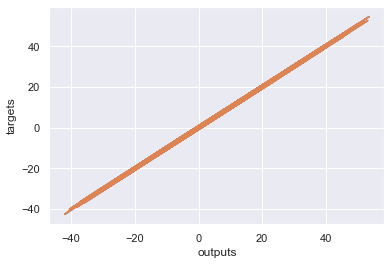

In [19]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()